## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import random

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [5]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [6]:
X.shape

(50,)

In [7]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

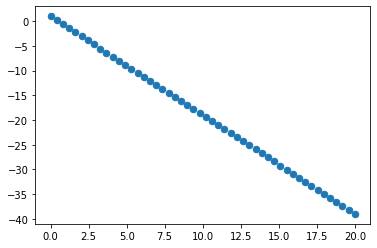

In [ ]:
plt.plot(X,y," ",marker=".", markersize=13)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [ ]:
def single_gradient_descent( X, y, alpha, iterations=1000, theta_0=0, theta_1=0):
  iter=0
  all_losses=[]
  allthetas_0=[]
  allthetas_1=[]
  all_predicted=[]
  m=X.shape[0]
  for i in range(0,iterations):
    #calculate Y predict
    h_x=theta_0+theta_1*X

    #save y predicted to array
    predicted=np.array(h_x)
    all_predicted.append(predicted)

    #initialize a 1D vecto for loss between y and y predict
    error_vector=np.array(m)
    error_vector_squared=np.array(m)

    # thetas=[theta_0,theta_1]
    allthetas_0.append(theta_0)
    allthetas_1.append(theta_1)

    
    #calculate loss between y and y predict
    error_vector=h_x-y
    error_vector_squared=pow(error_vector,2)

    #calculate cost function
    j=1/(2*m)*np.sum(error_vector_squared)

    #calculate gradient components (derviative for theta0 and theta 1)
    d_theta_0=(1/m)*np.sum(error_vector)
    d_theta_1=((1/m)*np.dot(error_vector.T,X))


    gradient_vector=np.array([[d_theta_0],[d_theta_1]])


    #gradient_norm
    gradient_norm=np.linalg.norm(gradient_vector) 

    print(f"****************** Iteration {i} ********************\n")
    print(f"h(x): {h_x}")
    print(" ")

    print("Error Vector: ")
    print(error_vector)
    print(" ")

    print(f"j = {j}")
    print(" ")

    print(f"Gradient Vector:")
    print(f"{gradient_vector}\n")

    print("Gradient Vector Norm:")
    print(f"{gradient_norm}\n")

    thetas_opt=[]
    diff=0
    if len(all_losses)>=1:
      index=len(all_losses)-1
      diff=all_losses[index]-j
    else: diff=j
    
    if diff<0.001 or gradient_norm<0.001:
      thetas_opt.append([theta_0,theta_1])

      print("****************** Training Report ********************\n")
      print(f"Gradient Descent converged after {i} epochs")
      print(f"theta_0_Opt :{thetas_opt[0][0]}")
      print(f"theta_1_Opt :{thetas_opt[0][1]}")
      print("Error Vector: ")
      print(error_vector)
      print(" ")
      print(f"Cost = {j}")

      print("h(x) = y_predict:")
      print(f"{h_x}\n")
      print("y_actual:")
      print(y)

      #save all data to plot later into arrays
      iter=i+1
      all_predicted=np.array(all_predicted)
      allthetas_0=np.array(allthetas_0)
      allthetas_1=np.array(allthetas_1)
      all_losses.append(j)
      all_losses=np.array(all_losses)
      return thetas_opt,allthetas_0,allthetas_1,all_losses,all_predicted,iter
      break


    #update theta
    theta_0=theta_0-(alpha*d_theta_0)
    theta_1=theta_1-(alpha*d_theta_1)

    print(f"theta_0_new : {theta_0}")
    print(f"theta_1_new : {theta_1}\n")
    all_losses.append(j)
  return allthetas_0,allthetas_1,all_losses,all_predicted,iter

  
  

  


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [ ]:
gradient=single_gradient_descent(X,y,0.0005,300)

<ipython-input-32-a49af4412eee>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gradient_vector=np.array([[d_theta_0],[d_theta_1]])


Streaming output truncated to the last 5000 lines.
 [-1.02339976]
 [ 0.50204478]
 [ 1.62070411]
 [ 0.19695587]
 [ 2.73936344]
 [ 2.63766714]
 [ 1.4173115 ]
 [ 1.2139189 ]
 [ 1.82409672]
 [-0.71831085]
 [ 2.94275605]
 [ 3.75632647]
 [ 0.40034848]
 [ 3.34954126]
 [-0.31152564]
 [ 3.65463017]
 [ 3.14614865]
 [-0.20982934]
 [ 1.3156152 ]
 [ 2.53597084]
 [ 3.45123756]
 [ 2.12918562]
 [-0.10813304]
 [ 1.51900781]
 [ 3.85802277]
 [ 2.33257823]
 [-0.00643673]
 [ 3.04445235]
 [ 2.43427453]
 [ 0.90882999]
 [-0.61661455]
 [ 3.24784496]]
 
j = 2.0104861688142033
 
Gradient Vector:
[[1.3664633535728152]
 [array([[22.30881928]])]]

Gradient Vector Norm:
[[22.35062951]]

theta_0_new : -0.12577929774905103
theta_1_new : [[-1.76199847]]

****************** Iteration 36 ********************

h(x): [[-10.19434197]
 [ -0.1257793 ]
 [-21.70127074]
 [-20.26290464]
 [-23.85881988]
 [-28.17391817]
 [-13.07107416]
 [-22.42045379]
 [-33.20819951]
 [-15.22862331]
 [ -1.56414539]
 [-15.94780635]
 [ -2.28332844]
 

<ipython-input-32-a49af4412eee>:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  allthetas_1=np.array(allthetas_1)


#### Calculate r2 score

In [ ]:
len(gradient[3])
len(gradient[1])


77

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,gradient[4][-1])

0.9975395965150151

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

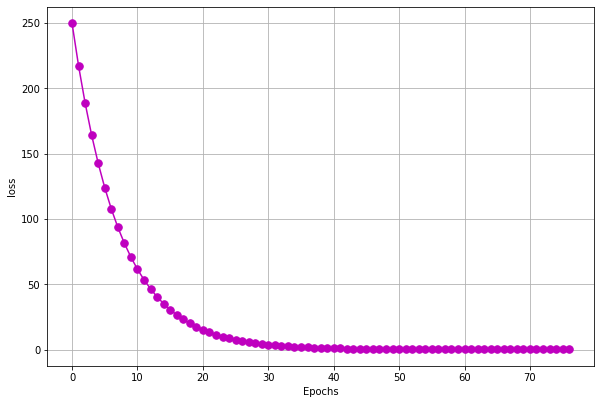

In [ ]:
plt.rcParams['figure.figsize'] = [9.8, 6.6]
plt.plot(range(0,gradient[5]),gradient[3],"-m",marker=".",markersize=15)
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.grid()

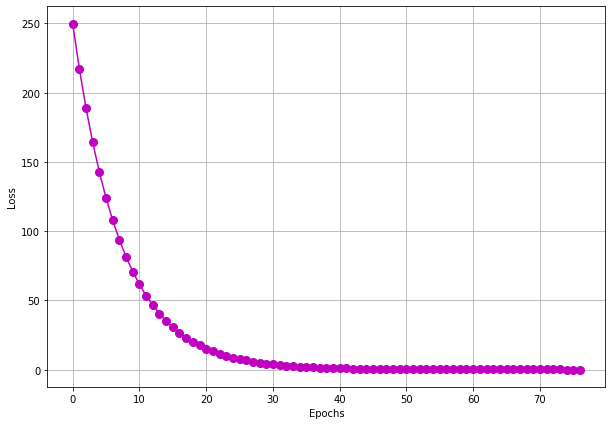

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

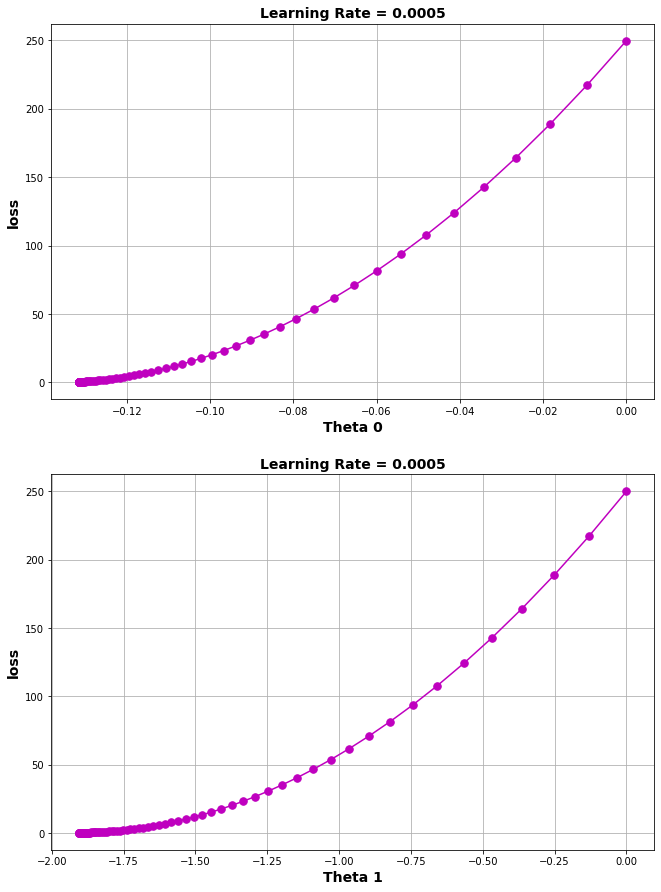

In [ ]:
# fig,subs=plt.subplots(2,1,figsize=(10.8, 15.2))
fig = plt.figure(figsize=(10.8, 15.2))

fig.add_subplot(2,1,1)
plt.plot(gradient[1],gradient[3],"-m",marker=".",markersize=15)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.0005",fontweight='bold',fontsize=14.0)
plt.grid()

fig.add_subplot(2,1,2)
plt.plot(gradient[2],gradient[3],"-m",marker=".",markersize=15)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.0005",fontweight='bold',fontsize=14.0)
plt.grid()




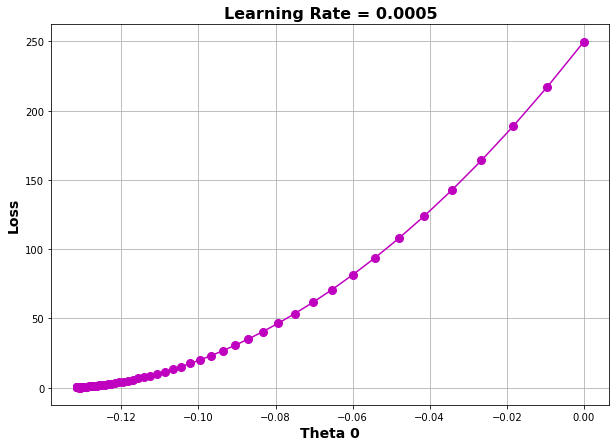

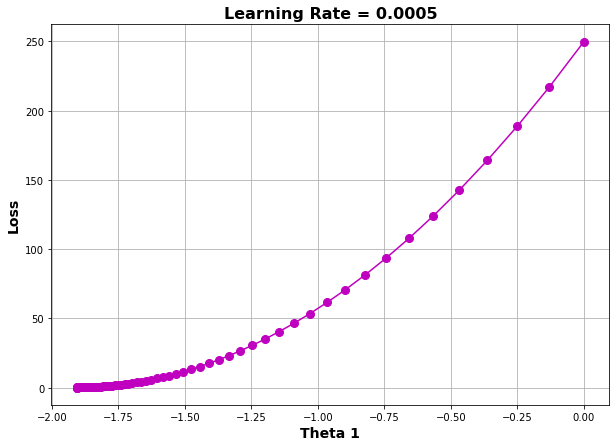

#### Plot all regression lines till converge

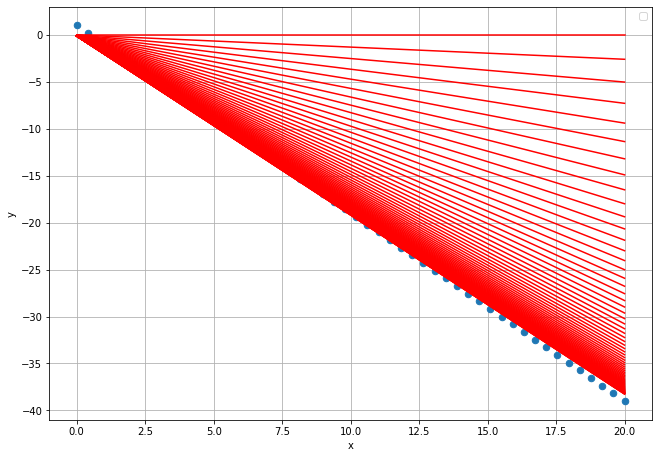

In [ ]:
plt.plot(X,y," ",marker=".", markersize=13)
plt.ylabel("y")
plt.xlabel("x")
for pint in gradient[4]:
  plt.plot(X,pint,color='r')
plt.grid()
plt.legend()

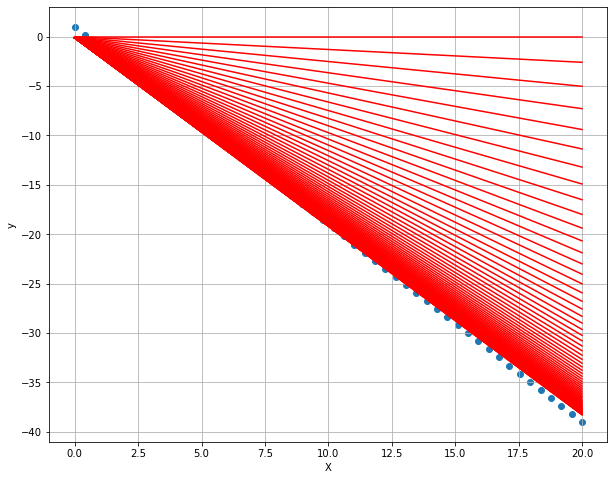

#### Plot the best regression line

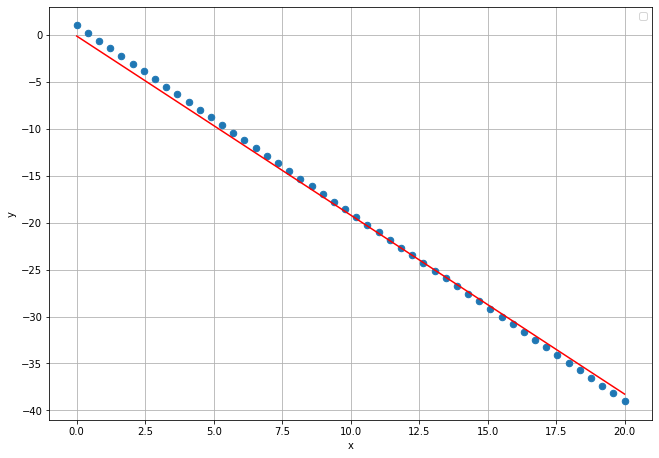

In [ ]:
plt.plot(X,y," ",marker=".", markersize=13)
plt.ylabel("y")
plt.xlabel("x")
plt.plot(X,gradient[4][-1],color='r')
plt.grid()
plt.legend()

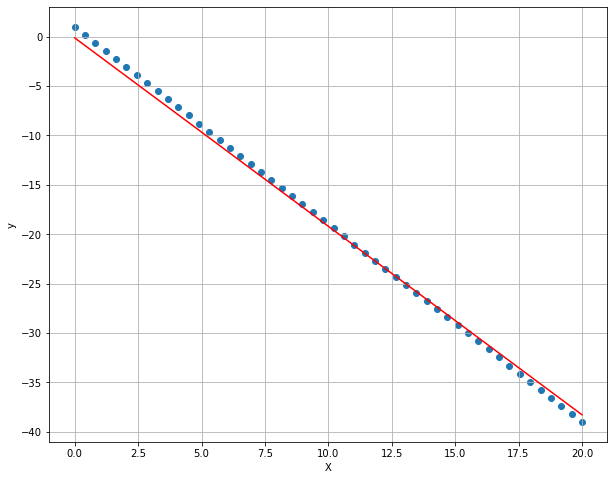

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [ ]:
gradient2=single_gradient_descent(X,y,0.00005 ,1000)

Streaming output truncated to the last 5000 lines.
theta_0_new : -0.12959044620364027
theta_1_new : -1.8336941423059814

****************** Iteration 464 ********************

h(x): [ -0.12959045  -0.87803703  -1.62648362  -2.37493021  -3.1233768
  -3.87182339  -4.62026998  -5.36871657  -6.11716316  -6.86560974
  -7.61405633  -8.36250292  -9.11094951  -9.8593961  -10.60784269
 -11.35628928 -12.10473587 -12.85318245 -13.60162904 -14.35007563
 -15.09852222 -15.84696881 -16.5954154  -17.34386199 -18.09230857
 -18.84075516 -19.58920175 -20.33764834 -21.08609493 -21.83454152
 -22.58298811 -23.3314347  -24.07988128 -24.82832787 -25.57677446
 -26.32522105 -27.07366764 -27.82211423 -28.57056082 -29.31900741
 -30.06745399 -30.81590058 -31.56434717 -32.31279376 -33.06124035
 -33.80968694 -34.55813353 -35.30658011 -36.0550267  -36.80347329]
 
Error Vector: 
[-1.12959045 -1.0617105  -0.99383056 -0.92595062 -0.85807068 -0.79019074
 -0.72231079 -0.65443085 -0.58655091 -0.51867097 -0.45079103 -0.3829

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,gradient2[4][-1])

0.9965793400861428

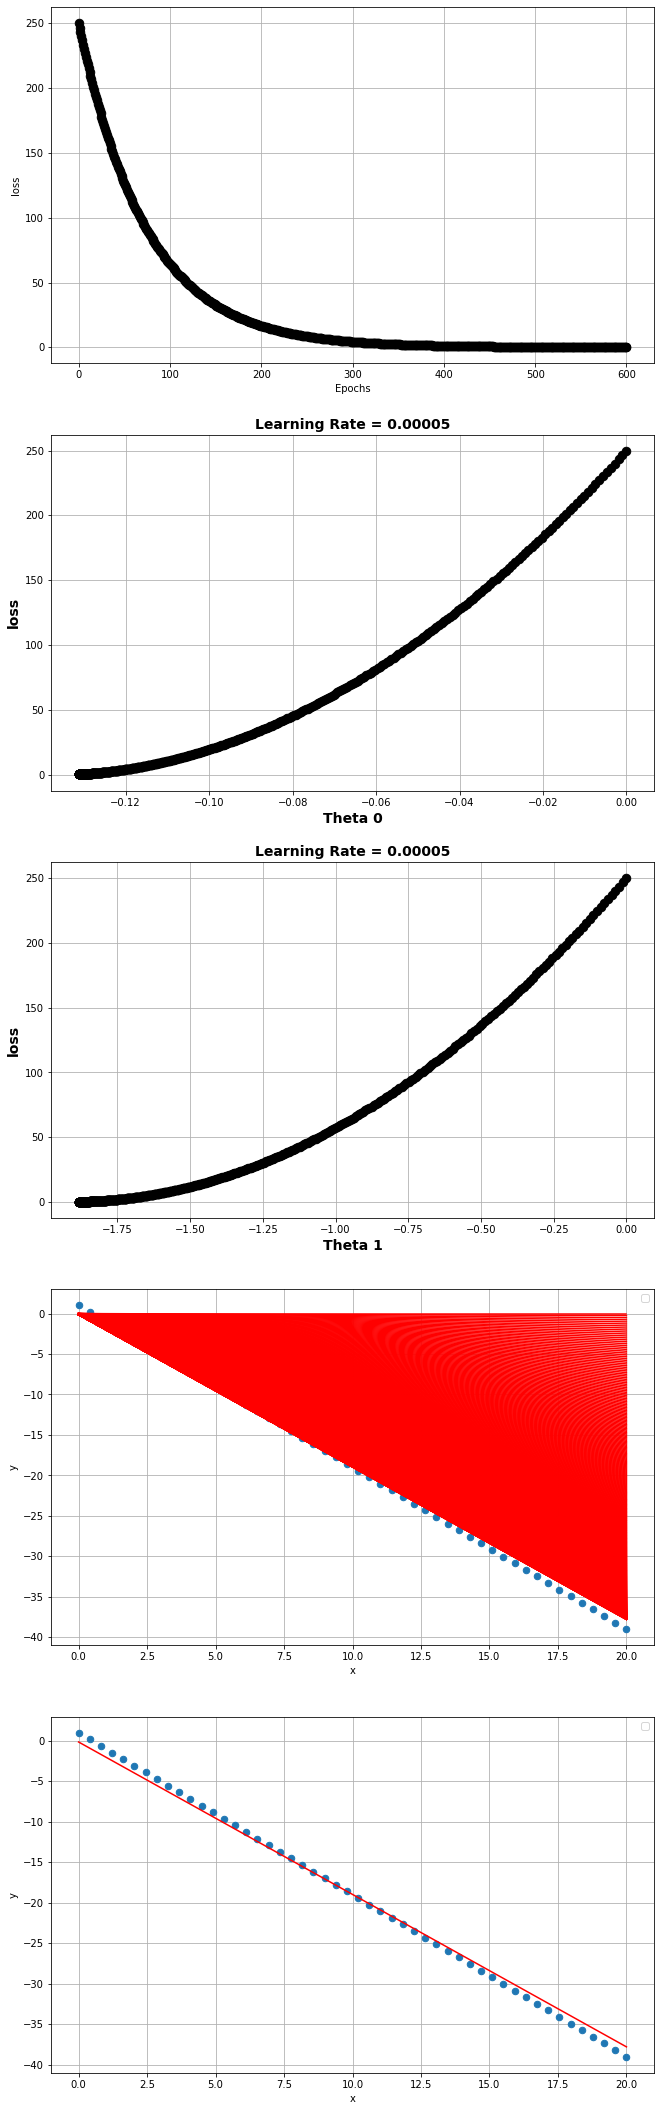

In [ ]:
# fig,subs=plt.subplots(2,1,figsize=(8.8, 15.2))
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt.plot(range(0,gradient2[5]),gradient2[3],"-k",marker=".",markersize=17)
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.grid()

fig.add_subplot(5,1,2)
plt.plot(gradient2[1],gradient2[3],"-k",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()

fig.add_subplot(5,1,3)
plt.plot(gradient2[2],gradient2[3],"-k",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()

fig.add_subplot(5,1,4)
plt.plot(X,y," ",marker=".", markersize=13)
plt.ylabel("y")
plt.xlabel("x")
for pint in gradient2[4]:
  plt.plot(X,pint,color='r')
plt.grid()
plt.legend()

fig.add_subplot(5,1,5)
plt.plot(X,y," ",marker=".", markersize=13)
plt.ylabel("y")
plt.xlabel("x")
plt.plot(X,gradient2[4][-1],color='r')
plt.grid()
plt.legend()

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [ ]:
gradient3=single_gradient_descent(X,y, 0.005 ,300)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
 
Error Vector: 
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
 
j = 249.88775510204087
 
Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.095
theta_1_new : -1.29693

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,gradient3[4][-1])

0.9976200723230484

In [ ]:
def drawplots(g):
  # fig,subs=plt.subplots(2,1,figsize=(8.8, 15.2))
  fig = plt.figure(figsize=(10.8, 38))

  #loss and epochs
  fig.add_subplot(5,1,1)
  plt.plot(range(0,g[5]),g[3],"-b",marker=".",markersize=15)
  plt.ylabel("loss")
  plt.xlabel("Epochs")
  plt.grid()

#loss and theta 0
  fig.add_subplot(5,1,2)
  plt.plot(g[1],g[3],"-b",marker=".",markersize=17)
  plt.ylabel("loss",fontweight='bold',fontsize=14.0)
  plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
  plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
  plt.grid()

#loss and theta1
  fig.add_subplot(5,1,3)
  plt.plot(g[2],g[3],"-b",marker=".",markersize=17)
  plt.ylabel("loss",fontweight='bold',fontsize=14.0)
  plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
  plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
  plt.grid()

#line
  fig.add_subplot(5,1,4)
  plt.plot(X,y," ",marker=".", markersize=13)
  plt.ylabel("y")
  plt.xlabel("x")
  for pint in g[4]:
    plt.plot(X,pint,color='r')
  plt.grid()
  plt.legend()

  fig.add_subplot(5,1,5)
  plt.plot(X,y," ",marker=".", markersize=13)
  plt.ylabel("y")
  plt.xlabel("x")
  plt.plot(X,g[4][-1],color='r')
  plt.grid()
  plt.legend()


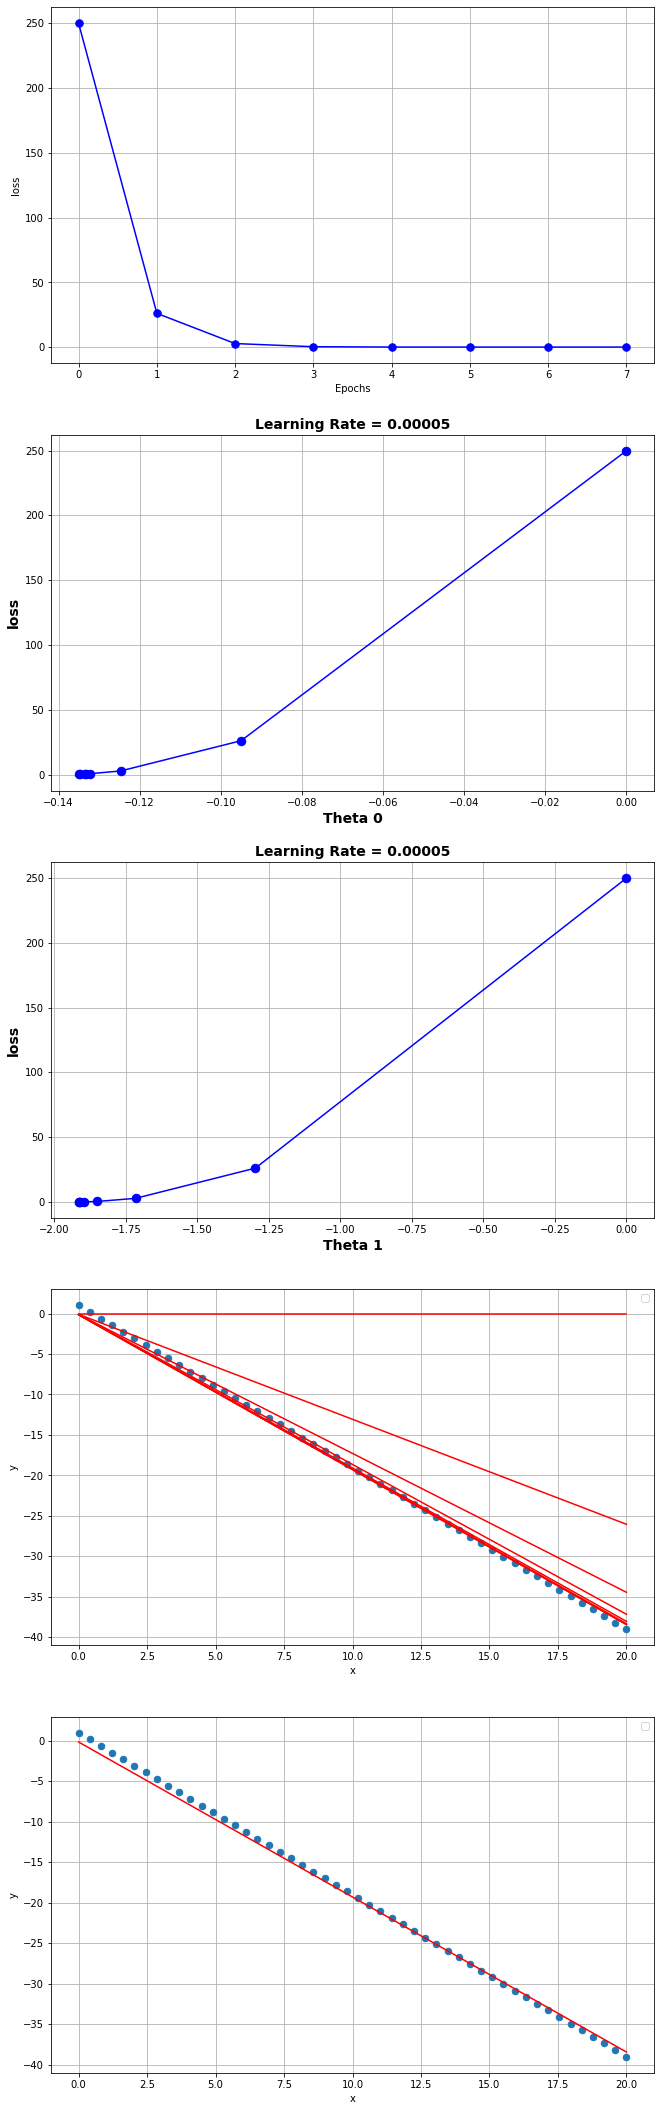

In [ ]:
drawplots(gradient3)

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [8]:
X = np.linspace(0,20)
# X=shuffle(X)

a=-2
b=1
y=a*X+b


(50,)


##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [9]:
def stochastic_gradient_descent(X, y, alpha, iterations=300, theta_0=0, theta_1=0):
    alldata = np.column_stack((X, y))
    alldata = shuffle(alldata)
    X = alldata[:, :-1]
    y = alldata[:, -1]
    # save data to plot
    allthetas_0 = []
    allthetas_1 = []
    all_losses = []
    all_predicted = []
    m = X.shape[0]
    iter = 0
    all_predicted = []

    for epoch in range(iterations):
        for i in range(m):
            # thetas=[theta_0,theta_1] save thetas
            allthetas_0.append(theta_0)
            allthetas_1.append(theta_1)

            # calculate Y predict
            h_x = theta_0 + theta_1 * X[i]

            # calculate cost
            # the error vector is considered an array
            error_vector = h_x - y[i]
            error_vector_squared = pow(error_vector, 2)

            # calculate cost function
            j = (1 / 2) * (error_vector_squared)
            all_losses.append(j)

            # calculate gradient components
            d_theta_0 = error_vector
            d_theta_1 = error_vector * X[i]

            gradient_vector = np.array([[d_theta_0],
                                        [d_theta_1]])
            gradient_norm = np.linalg.norm(gradient_vector)

            # update thetas
            theta_0 = theta_0 - (alpha * d_theta_0)
            theta_1 = theta_1 - (alpha * d_theta_1)

        iter += m

        # calculate convergence check
        diff = 1
        if epoch > 0:
            diff = abs(j - all_losses[(epoch * m) - 1])

        print(f"****************** Epoch {epoch} ********************\n")
        print(f"Cost (j) ={all_losses[-1]}\n")
        print(f"Gradient Vector :\n {gradient_vector}")
        print(f"Gradient Vector Norm:\n {gradient_norm}")
        print(f"theta_0_new : {theta_0}")
        print(f"theta_1_new : {theta_1}\n")

        if diff <= 0.001 or gradient_norm <= 0.01:
            print("****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {epoch} epochs\n")
            # put the last part of theta in another variable
            opt_theta_0 = allthetas_0[-1][0]
            opt_theta_1 = allthetas_1[-1][0]
            print(f"theta_0_Opt :{opt_theta_0}")
            print(f"theta_1_Opt :{opt_theta_1}\n")
            print(f"Cost = {all_losses[-1]}\n")
            thetas_opt = [opt_theta_0, opt_theta_1]

            # print(r2_score(y,y_hat))
            # all_predicted = np.array(y_hat)

            return thetas_opt, allthetas_0, allthetas_1, all_losses, iter
            break

    # transfom lists to array
    y_hat = allthetas_0[-1] + allthetas_1[-1] * X
    y_hat = y_hat.flatten()

    # all_predicted = np.array(y_hat)
    thetas_opt = np.array([allthetas_0[-1], allthetas_1[-1]])

    return thetas_opt, allthetas_0, allthetas_1, all_losses, iter

In [40]:
opt,allthetas_0,allthetas_1,all_losses,iter = stochastic_gradient_descent(X, y, 0.0005, 300)



****************** Epoch 0 ********************

Cost (j) =[0.06613863]

Gradient Vector :
 [[[0.36369942]]

 [[3.85966734]]]
Gradient Vector Norm:
 3.876765302062157
theta_0_new : [-0.12430175]
theta_1_new : [-1.86173147]

****************** Epoch 1 ********************

Cost (j) =[0.02026793]

Gradient Vector :
 [[[-0.20133518]]

 [[-2.13661819]]]
Gradient Vector Norm:
 2.146083207868805
theta_0_new : [-0.12055091]
theta_1_new : [-1.9123038]

****************** Epoch 2 ********************

Cost (j) =[0.02314563]

Gradient Vector :
 [[[-0.21515404]]

 [[-2.28326738]]]
Gradient Vector Norm:
 2.293382040661765
theta_0_new : [-0.11340502]
theta_1_new : [-1.91420535]

****************** Epoch 3 ********************

Cost (j) =[0.02293442]

Gradient Vector :
 [[[-0.21417013]]

 [[-2.27282585]]]
Gradient Vector Norm:
 2.282894260422867
theta_0_new : [-0.10621342]
theta_1_new : [-1.91479557]

****************** Training Report ********************

Gradient Descent converged after 3 epochs


In [41]:
# y_hat=opt[0]+X*opt[1]
y_hat=opt[0]+X*opt[1]

from sklearn.metrics import r2_score
print(r2_score(y,y_hat))





0.9977246605803348


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


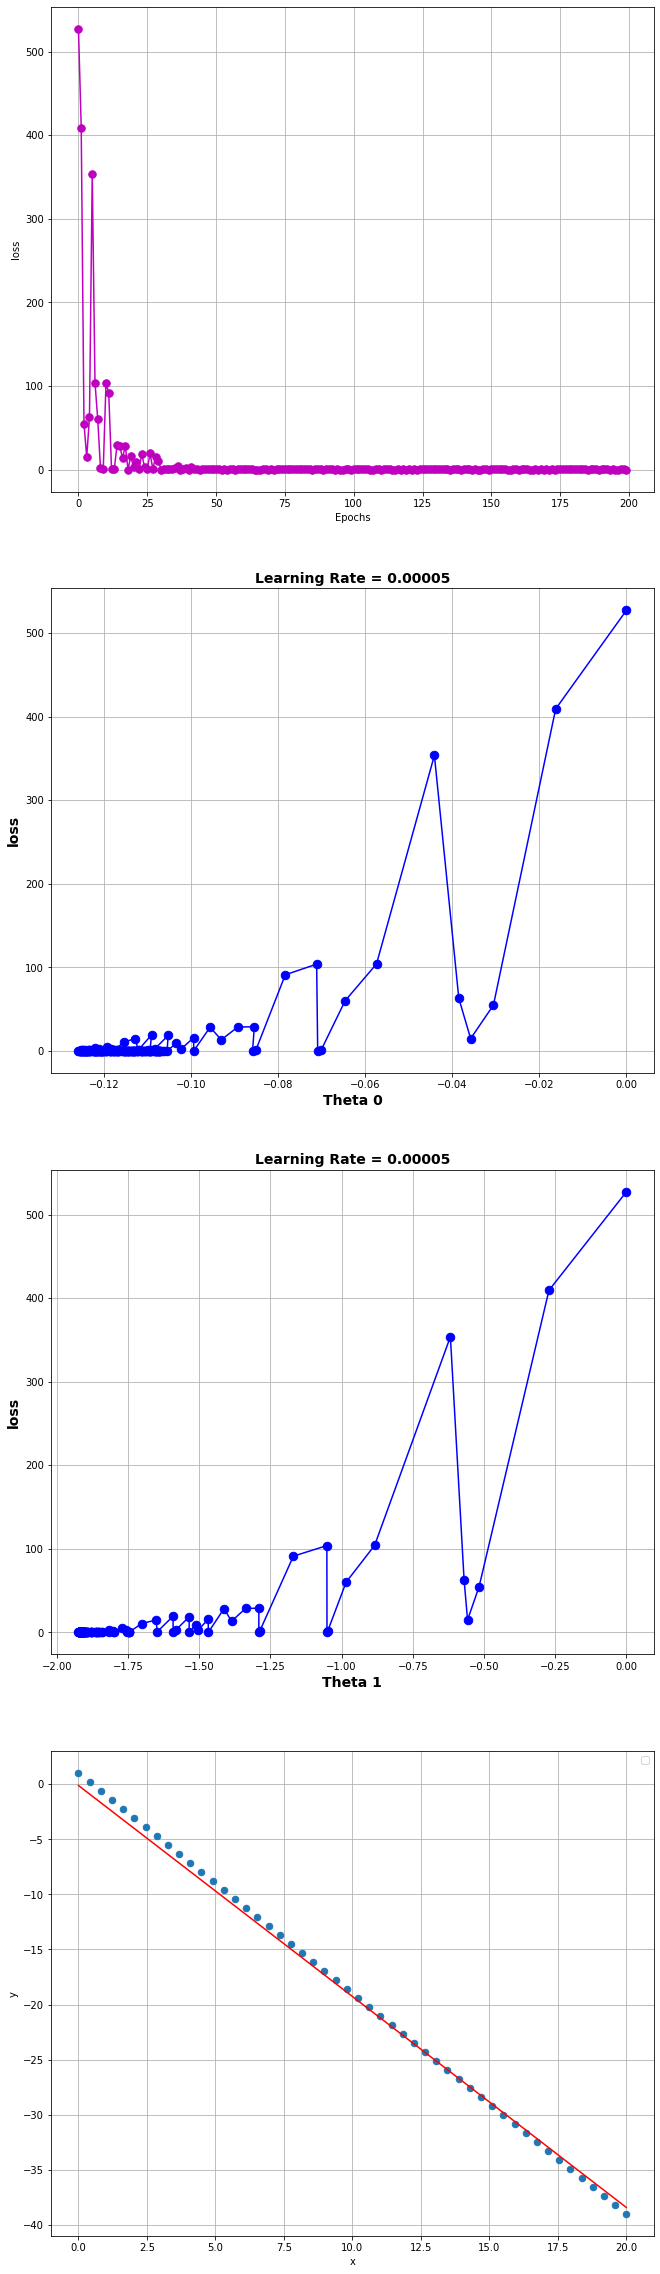

In [42]:
# fig,subs=plt.subplots(2,1,figsize=(8.8, 15.2))
fig = plt.figure(figsize=(10.8, 41))


#loss and epochs
fig.add_subplot(4,1,1)
plt.plot(range(0,iter),all_losses,"-m",marker=".",markersize=15)
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.grid()

#loss and theta 0
fig.add_subplot(4,1,2)
plt.plot(allthetas_0,all_losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()

#loss and theta1
fig.add_subplot(4,1,3)
plt.plot(allthetas_1,all_losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()


#x and y and y predicted
fig.add_subplot(4,1,4)
plt.plot(X,y," ",marker=".", markersize=13)
plt.plot(X,y_hat,color='r')
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.legend()

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [52]:
opt,allthetas_0,allthetas_1,all_losses,iter =stochastic_gradient_descent(X,y,0.0001,300)

****************** Epoch 0 ********************

Cost (j) =[0.5713337]

Gradient Vector :
 [[[-1.06895622]]

 [[-0.        ]]]
Gradient Vector Norm:
 1.0689562207125753
theta_0_new : [-0.06884933]
theta_1_new : [-0.95032352]

****************** Epoch 1 ********************

Cost (j) =[0.60821384]

Gradient Vector :
 [[[-1.10291781]]

 [[-0.        ]]]
Gradient Vector Norm:
 1.1029178053346735
theta_0_new : [-0.10280751]
theta_1_new : [-1.42910823]

****************** Epoch 2 ********************

Cost (j) =[0.62641844]

Gradient Vector :
 [[[-1.11930196]]

 [[-0.        ]]]
Gradient Vector Norm:
 1.119301963418303
theta_0_new : [-0.11919003]
theta_1_new : [-1.67035266]

****************** Epoch 3 ********************

Cost (j) =[0.63487555]

Gradient Vector :
 [[[-1.12683233]]

 [[-0.        ]]]
Gradient Vector Norm:
 1.126832326826972
theta_0_new : [-0.12671964]
theta_1_new : [-1.79193481]

****************** Epoch 4 ********************

Cost (j) =[0.63834093]

Gradient Vector :
 [[[

In [53]:
# y_hat=opt[0]+X*opt[1]
y_hat=opt[0]+X*opt[1]

from sklearn.metrics import r2_score
print(r2_score(y,y_hat))

0.9966404480043684


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


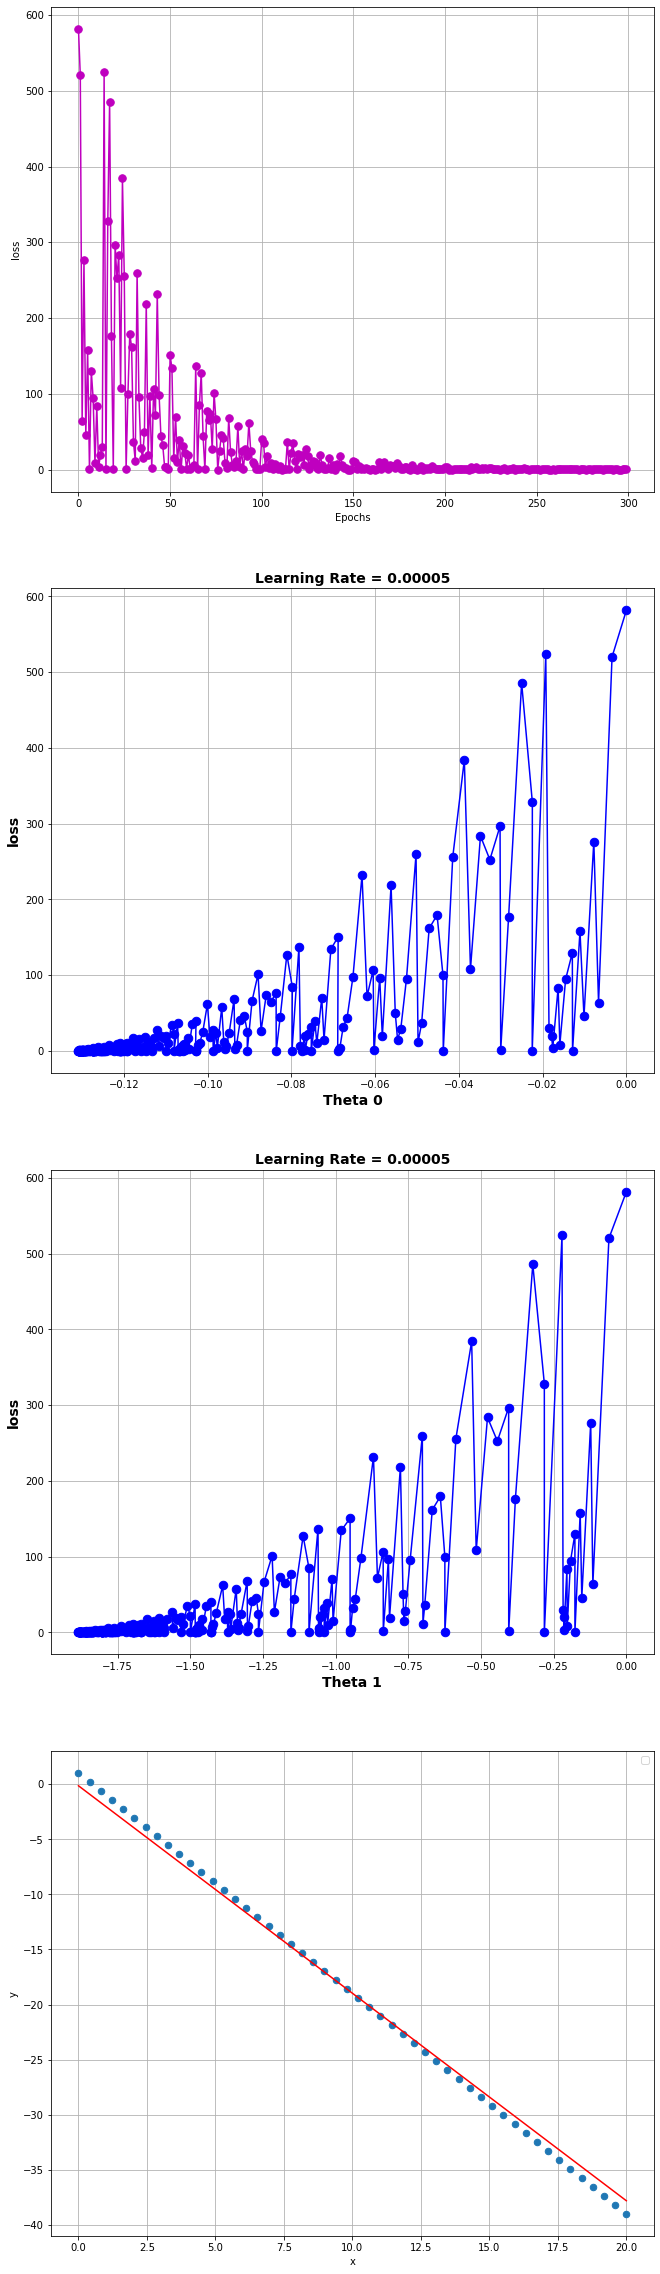

In [54]:
# fig,subs=plt.subplots(2,1,figsize=(8.8, 15.2))
fig = plt.figure(figsize=(10.8, 41))


#loss and epochs
fig.add_subplot(4,1,1)
plt.plot(range(0,iter),all_losses,"-m",marker=".",markersize=15)
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.grid()

#loss and theta 0
fig.add_subplot(4,1,2)
plt.plot(allthetas_0,all_losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()

#loss and theta1
fig.add_subplot(4,1,3)
plt.plot(allthetas_1,all_losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()


#x and y and y predicted
fig.add_subplot(4,1,4)
plt.plot(X,y," ",marker=".", markersize=13)
plt.plot(X,y_hat,color='r')
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.legend()

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [36]:
st3=stochastic_gradient_descent(X,y, 0.0007,300)

****************** Epoch 0 ********************

Cost (j) =[0.09042802]

Gradient Vector :
 [[[0.42527172]]

 [[6.42247085]]]
Gradient Vector Norm:
 6.436535396316565
theta_0_new : [-0.12680722]
theta_1_new : [-1.90174265]

****************** Epoch 1 ********************

Cost (j) =[0.02793146]

Gradient Vector :
 [[[0.23635338]]

 [[3.56941837]]]
Gradient Vector Norm:
 3.577235023484201
theta_0_new : [-0.11738967]
theta_1_new : [-1.91286981]

****************** Epoch 2 ********************

Cost (j) =[0.02719504]

Gradient Vector :
 [[[0.23321682]]

 [[3.52204996]]]
Gradient Vector Norm:
 3.5297628866230286
theta_0_new : [-0.10732258]
theta_1_new : [-1.9137108]

****************** Training Report ********************

Gradient Descent converged after 2 epochs

theta_0_Opt :-0.10715932972162177
theta_1_Opt :-1.9112453629299622

Cost = [0.02719504]



In [37]:
from sklearn.metrics import r2_score
y_hat=st3[0][0]+st3[0][1]*X
r2_score(y,y_hat)

0.9976831149618866

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


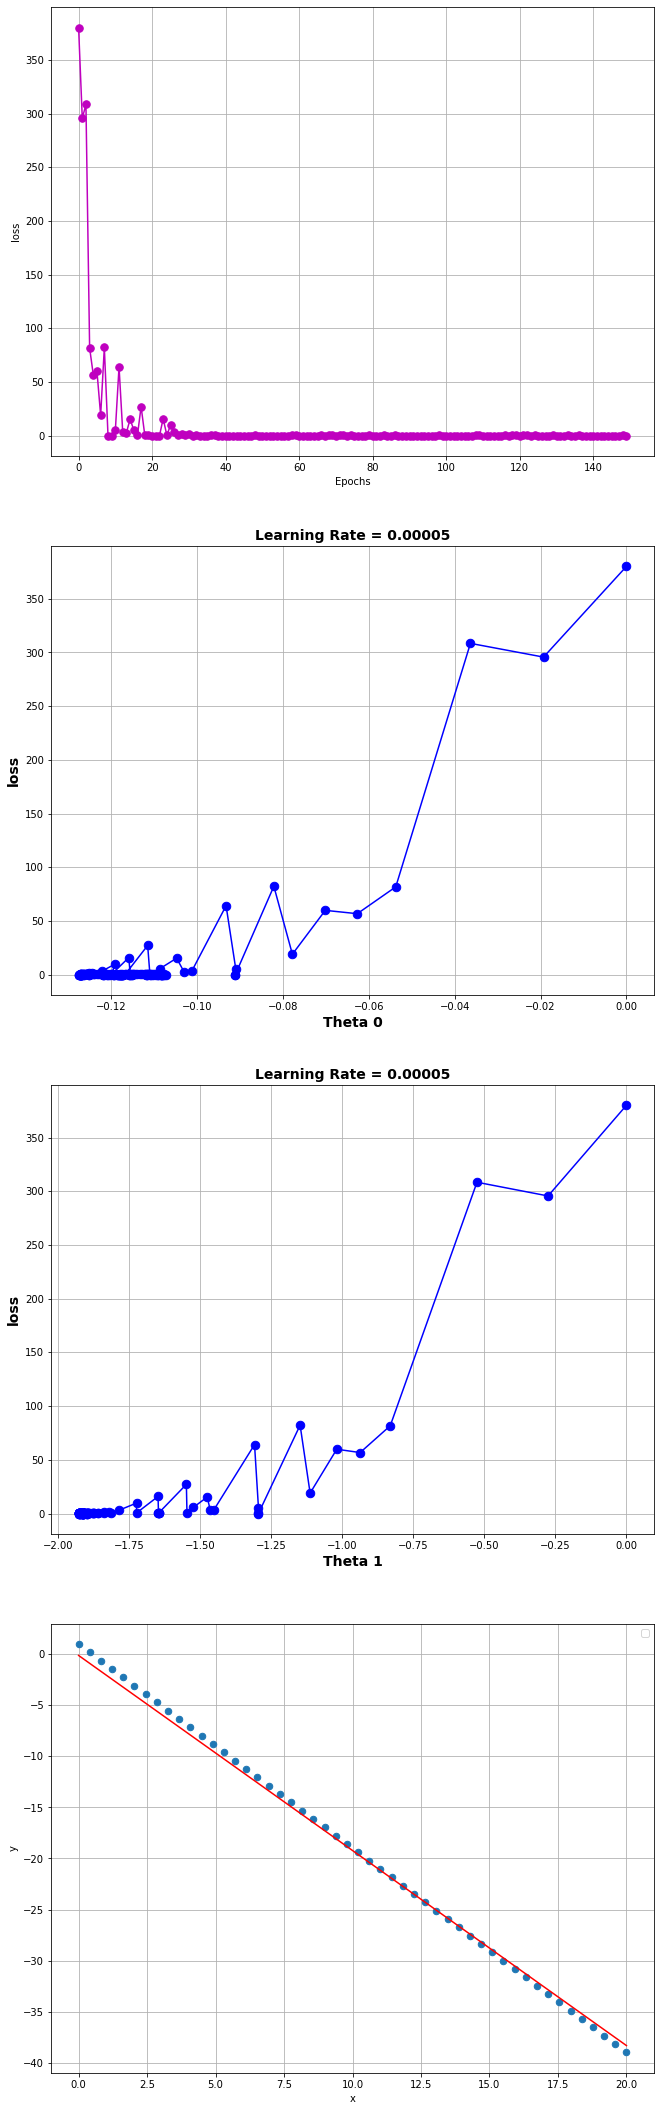

In [39]:
# fig,subs=plt.subplots(2,1,figsize=(8.8, 15.2))
fig = plt.figure(figsize=(10.8, 38))

#loss and epochs
fig.add_subplot(4,1,1)
plt.plot(range(0,st3[4]),st3[3],"-m",marker=".",markersize=15)
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.grid()

#loss and theta 0
fig.add_subplot(4,1,2)
plt.plot(st3[1],st3[3],"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()

#loss and theta1
fig.add_subplot(4,1,3)
plt.plot(st3[2],st3[3],"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()


#x and y and y predicted
fig.add_subplot(4,1,4)
plt.plot(X,y," ",marker=".", markersize=13)
plt.ylabel("y")
plt.xlabel("x")
# stochastic[4].reshape(-1)
plt.plot(X,y_hat,color='r')
plt.grid()
plt.legend()

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [66]:

# x= np.linspace(0,20)
# alldata=np.stack((x,y))
# np.random.shuffle(alldata)
# X=alldata[:,:-1]
# y=alldata[:,-1]


def mini_batch(x, y, batch, alpha, iterations, theta_0=0, theta_1=0):
  #shuffle the data
    alldata = np.column_stack((x, y))
    alldata = shuffle(alldata)
    X = alldata[:, :-1]
    y = alldata[:, -1]

#initial the lists to draw later
    allthetas_0 = []
    allthetas_1 = []
    losses = []
    all_predicted = []
    iter=0
    m = x.shape[0]

    #get number of batches
    number_of_batches = m // batch
    for epoch in range(iterations):
        for i in range(number_of_batches):

            # thetas=[theta_0,theta_1]
            allthetas_0.append(theta_0)
            allthetas_1.append(theta_1)

            #get mini batch from x and y
            mini_x = X[i * batch:(i + 1) * batch]
            mini_x=mini_x.flatten()
            mini_y = y[i * batch:(i + 1) * batch]
            h_x = theta_0 + theta_1 * mini_x

            # save y predicted to array
            predicted = np.array(h_x)
            all_predicted.append(predicted)

            # initialize a 1D vecto for loss between y and y predict
            error_vector = np.array(m)
            error_vector_squared = np.array(m)



            # calculate loss between y and y predict vectors
            error_vector = h_x - mini_y
            error_vector_squared = pow(error_vector, 2)

            # calculate cost function
            j = (1 / 2 * batch) * np.sum(error_vector_squared)
            losses.append(j)

            # calculate gradient components (derviative for theta0 and theta 1)
            d_theta_0 = (1 / batch) * np.sum(error_vector)
            d_theta_1 = ((1 / batch) * np.dot(error_vector.T, mini_x))

            gradient_vector = np.array([[d_theta_0], [d_theta_1]])

            # gradient_norm
            gradient_norm = np.linalg.norm(gradient_vector)

            # update theta
            theta_0 = theta_0 - (alpha * d_theta_0)
            theta_1 = theta_1 - (alpha * d_theta_1)

        iter += number_of_batches


        # calculate convergence check
        diff = 1
        if epoch > 0:
            diff = abs(j - losses[(epoch * number_of_batches) - 1])

        print(f"****************** Epoch {epoch} ********************\n")
        print(f"Cost (j) ={losses[-1]}\n")
        print(f"Gradient Vector :\n {gradient_vector}")
        print(f"Gradient Vector Norm:\n {gradient_norm}")
        print(f"theta_0_new : {theta_0}")
        print(f"theta_1_new : {theta_1}\n")

        if diff <= 0.01 or gradient_norm <= 0.01:
            print("****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {epoch} epochs\n")
            # put the last part of theta in another variable
            opt_theta_0 = allthetas_0[-1]
            opt_theta_1 = allthetas_1[-1]
            print(f"theta_0_Opt :{opt_theta_0}")
            print(f"theta_1_Opt :{opt_theta_1}\n")
            print(f"Cost = {losses[-1]}\n")
            thetas_opt = [allthetas_0[-1], allthetas_1[-1]]

            return thetas_opt, allthetas_0, allthetas_1, losses, iter
            break



    thetas_opt = [allthetas_0[-1], allthetas_1[-1]]

    return thetas_opt, allthetas_0, allthetas_1, losses, iter


  


##### The following results uses batch size=5, alpha = 0.0005 and max. 

---

iterations = 300.

In [110]:
opt,allthetas_0,allthetas_1,all_losses,iter =mini_batch(X,y,5,0.0005,300)

****************** Epoch 0 ********************

Cost (j) =1254.2110921828923

Gradient Vector :
 [[  8.81580341]
 [101.53039579]]
Gradient Vector Norm:
 101.91241170416895
theta_0_new : -0.0696316863488648
theta_1_new : -0.9700278483173609

****************** Epoch 1 ********************

Cost (j) =297.044274130625

Gradient Vector :
 [[ 4.16422726]
 [49.2254376 ]]
Gradient Vector Norm:
 49.40126005620184
theta_0_new : -0.10324841774099669
theta_1_new : -1.4487102981849707

****************** Epoch 2 ********************

Cost (j) =69.52370661483512

Gradient Vector :
 [[ 1.86930501]
 [23.41846832]]
Gradient Vector Norm:
 23.492955536734684
theta_0_new : -0.1190957558132897
theta_1_new : -1.6849551282333541

****************** Epoch 3 ********************

Cost (j) =16.84384063179926

Gradient Vector :
 [[ 0.73719256]
 [10.68602217]]
Gradient Vector Norm:
 10.711420195151183
theta_0_new : -0.1261763464596965
theta_1_new : -1.8015773518940743

****************** Epoch 4 ***************

In [111]:
y_hat=opt[0]+opt[1]*X
from sklearn.metrics import r2_score
print(r2_score(y,y_hat))

0.9976590695919961


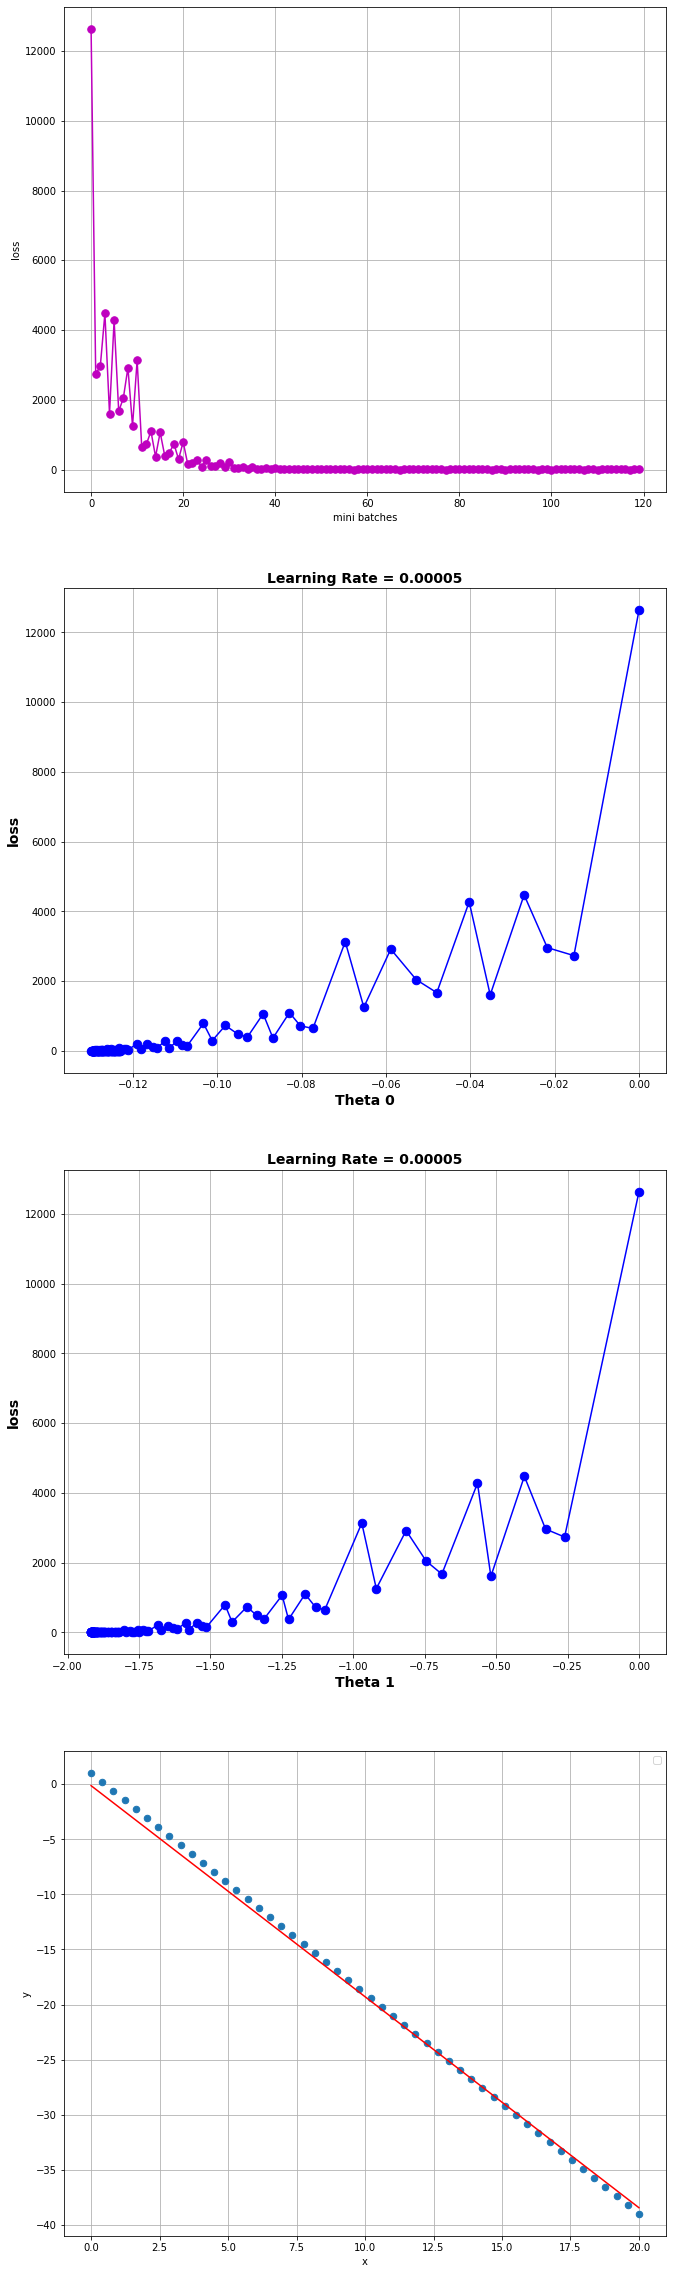

In [112]:
# fig,subs=plt.subplots(2,1,figsize=(8.8, 15.2))
fig = plt.figure(figsize=(10.8, 41))


#loss and epochs
fig.add_subplot(4,1,1)
# all_losses=np.array(all_losses)
plt.plot(range(0,iter),all_losses,"-m",marker=".",markersize=15)
plt.ylabel("loss")
plt.xlabel("mini batches")
plt.grid()

#loss and theta 0
fig.add_subplot(4,1,2)
plt.plot(allthetas_0,all_losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()

#loss and theta1
fig.add_subplot(4,1,3)
plt.plot(allthetas_1,all_losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()


#x and y and y predicted
fig.add_subplot(4,1,4)
plt.plot(X,y," ",marker=".", markersize=13)
plt.plot(X,y_hat,color='r')
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.legend()

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [114]:
opt,allthetas_0,allthetas_1,all_losses,iter =mini_batch(X,y,10,0.0005,300)

****************** Epoch 0 ********************

Cost (j) =8507.048048701712

Gradient Vector :
 [[ 10.46522076]
 [121.39039185]]
Gradient Vector Norm:
 121.8406667684196
theta_0_new : -0.04163435054938423
theta_1_new : -0.5697441311389648

****************** Epoch 1 ********************

Cost (j) =4163.986486671141

Gradient Vector :
 [[ 7.20551334]
 [84.82927881]]
Gradient Vector Norm:
 85.134751807656
theta_0_new : -0.0706676819027505
theta_1_new : -0.9700433831139702

****************** Epoch 2 ********************

Cost (j) =2033.9785035522464

Gradient Vector :
 [[ 4.91544648]
 [59.14295844]]
Gradient Vector Norm:
 59.346871417858395
theta_0_new : -0.09084809909948463
theta_1_new : -1.2512963316110441

****************** Epoch 3 ********************

Cost (j) =992.2401415856517

Gradient Vector :
 [[ 3.30661652]
 [41.09690275]]
Gradient Vector Norm:
 41.22971171713592
theta_0_new : -0.10480889503246328
theta_1_new : -1.448911326799171

****************** Epoch 4 *****************

In [115]:
y_hat=opt[0]+opt[1]*X
from sklearn.metrics import r2_score
print(r2_score(y,y_hat))

0.9974490738085988


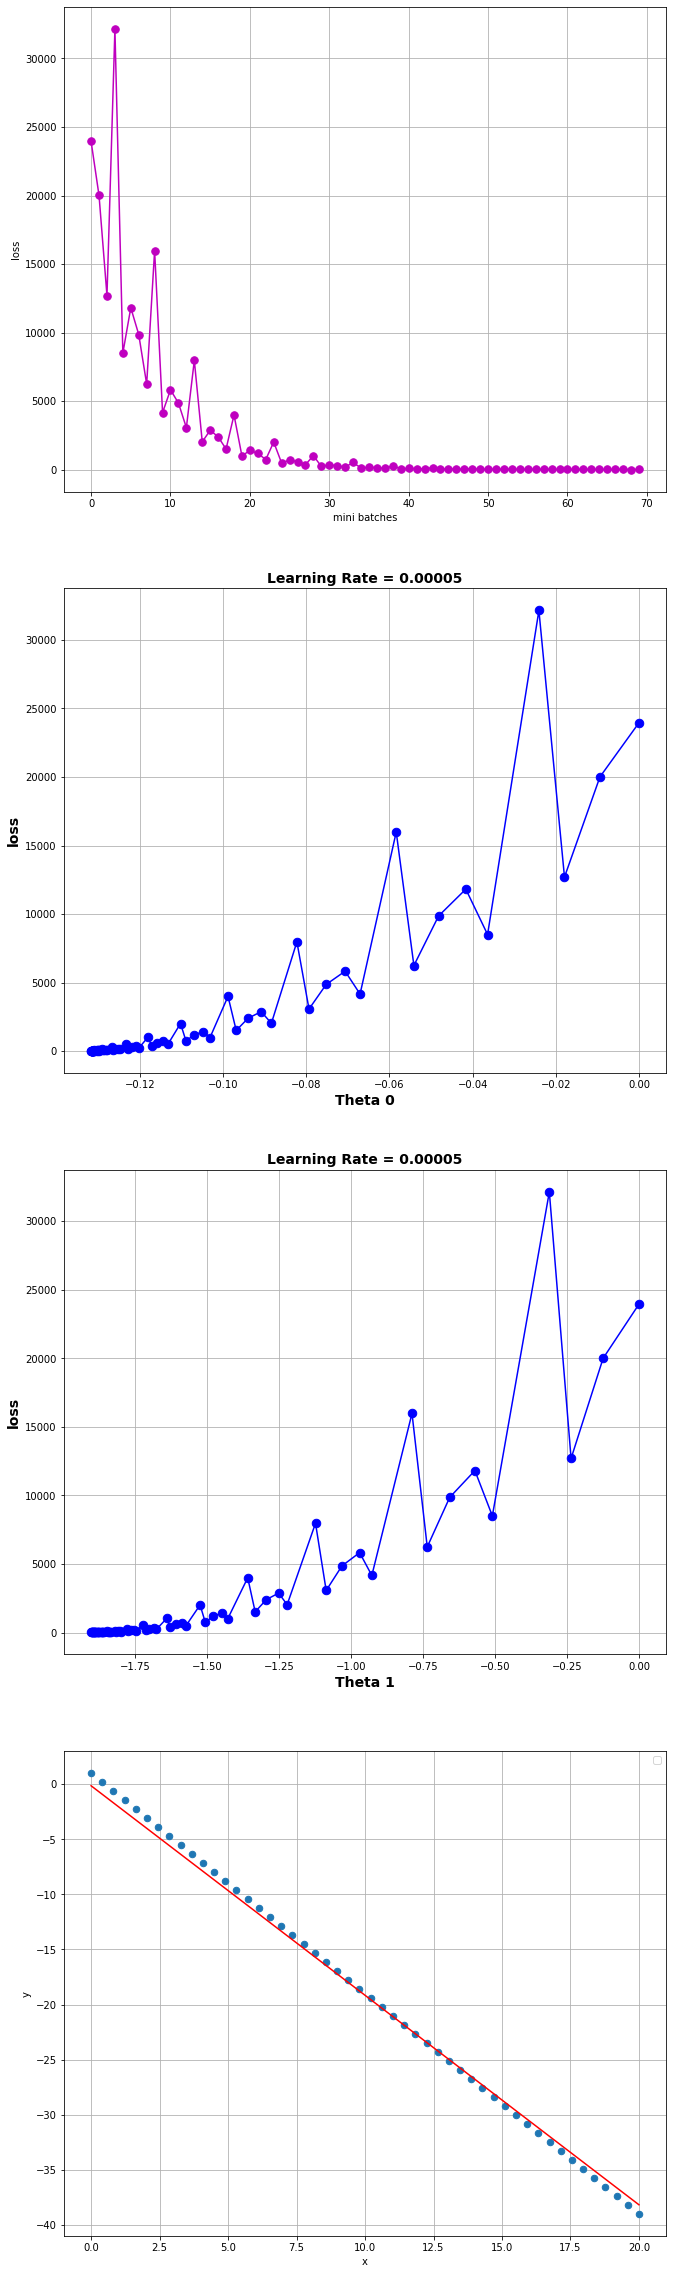

In [116]:
# fig,subs=plt.subplots(2,1,figsize=(8.8, 15.2))
fig = plt.figure(figsize=(10.8, 41))


#loss and epochs
fig.add_subplot(4,1,1)
# all_losses=np.array(all_losses)
plt.plot(range(0,iter),all_losses,"-m",marker=".",markersize=15)
plt.ylabel("loss")
plt.xlabel("mini batches")
plt.grid()

#loss and theta 0
fig.add_subplot(4,1,2)
plt.plot(allthetas_0,all_losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()

#loss and theta1
fig.add_subplot(4,1,3)
plt.plot(allthetas_1,all_losses,"-b",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()


#x and y and y predicted
fig.add_subplot(4,1,4)
plt.plot(X,y," ",marker=".", markersize=13)
plt.plot(X,y_hat,color='r')
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.legend()

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [132]:
opt,allthetas_0,allthetas_1,all_losses,iter =mini_batch(X,y,20,0.0005,300)

****************** Epoch 0 ********************

Cost (j) =75699.0579850456

Gradient Vector :
 [[ 16.17014547]
 [214.80388908]]
Gradient Vector Norm:
 215.41166256621037
theta_0_new : -0.019074868653792213
theta_1_new : -0.26924555137176465

****************** Epoch 1 ********************

Cost (j) =55899.36137610051

Gradient Vector :
 [[ 13.84790794]
 [184.55823163]]
Gradient Vector Norm:
 185.07702563088662
theta_0_new : -0.035432292890942275
theta_1_new : -0.5006974611548418

****************** Epoch 2 ********************

Cost (j) =41276.51218141681

Gradient Vector :
 [[ 11.85167759]
 [158.55846212]]
Gradient Vector Norm:
 159.00078041496062
theta_0_new : -0.04945375563485766
theta_1_new : -0.6996611747063594

****************** Epoch 3 ********************

Cost (j) =30477.943567162325

Gradient Vector :
 [[ 10.13568974]
 [136.20854566]]
Gradient Vector Norm:
 136.58513870908078
theta_0_new : -0.061467187489413655
theta_1_new : -0.8706973625208208

****************** Epoch 4 *

In [134]:
y_hat=opt[0]+opt[1]*X
from sklearn.metrics import r2_score
print(r2_score(y,y_hat))

0.9976435610723257


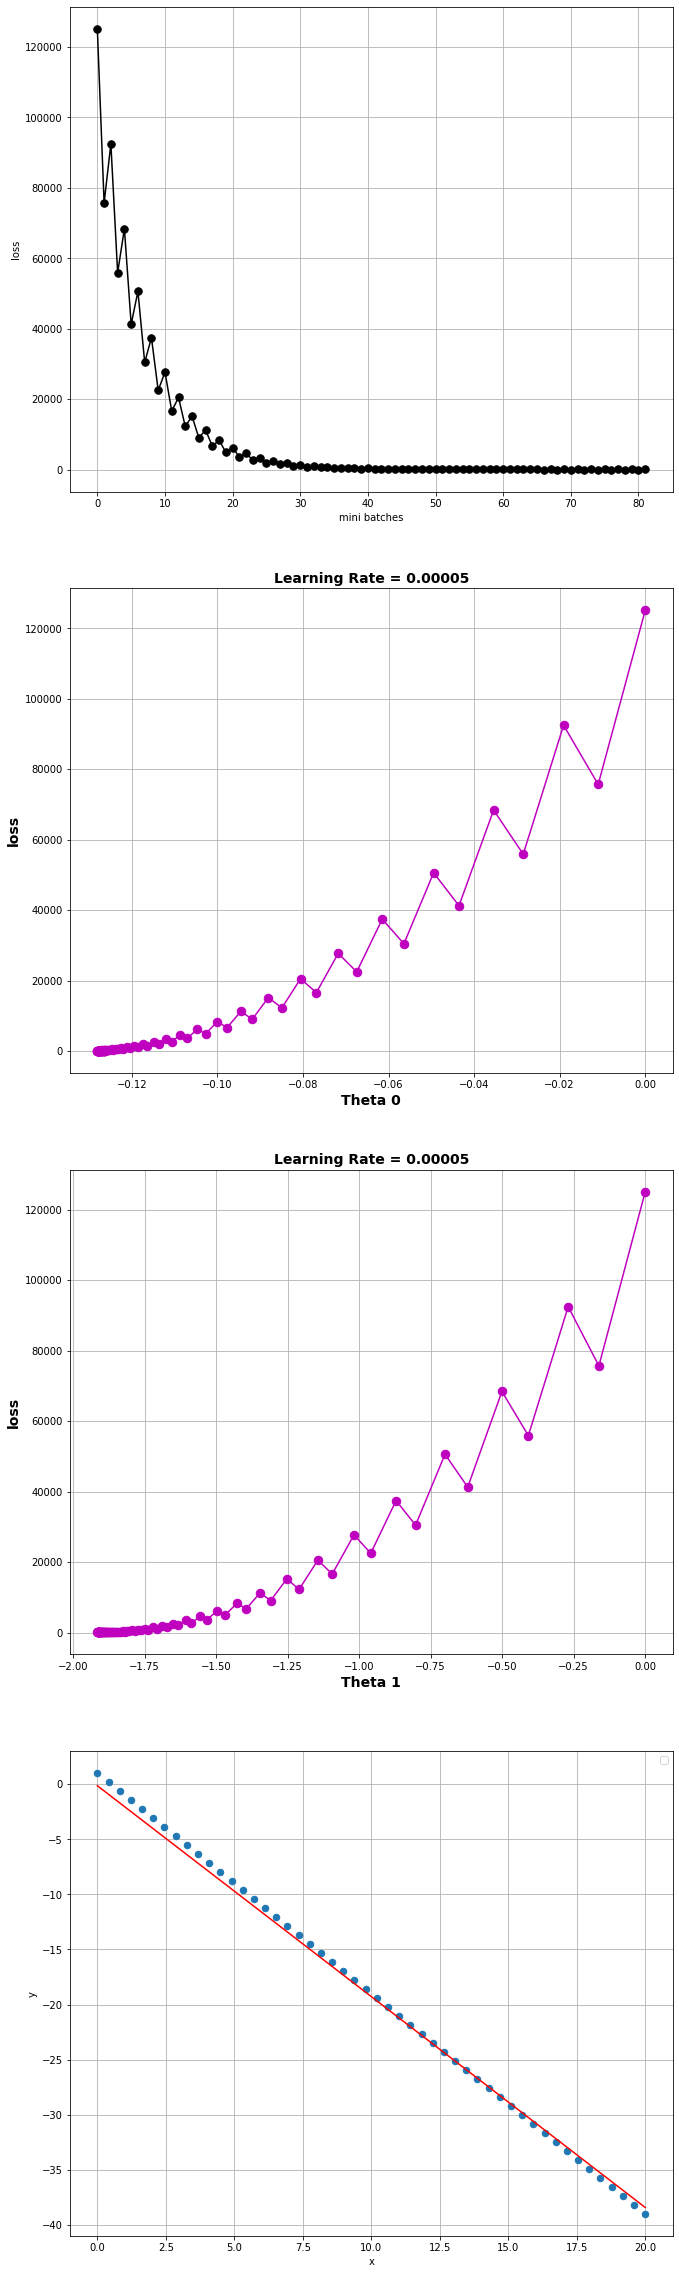

In [135]:
# fig,subs=plt.subplots(2,1,figsize=(8.8, 15.2))
fig = plt.figure(figsize=(10.8, 41))


#loss and epochs
fig.add_subplot(4,1,1)
# all_losses=np.array(all_losses)
plt.plot(range(0,iter),all_losses,"-k",marker=".",markersize=15)
plt.ylabel("loss")
plt.xlabel("mini batches")
plt.grid()

#loss and theta 0
fig.add_subplot(4,1,2)
plt.plot(allthetas_0,all_losses,"-m",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()

#loss and theta1
fig.add_subplot(4,1,3)
plt.plot(allthetas_1,all_losses,"-m",marker=".",markersize=17)
plt.ylabel("loss",fontweight='bold',fontsize=14.0)
plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
plt.title("Learning Rate = 0.00005",fontweight='bold',fontsize=14.0)
plt.grid()


#x and y and y predicted
fig.add_subplot(4,1,4)
plt.plot(X,y," ",marker=".", markersize=13)
plt.plot(X,y_hat,color='r')
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.legend()